Every customer is assigned to facility in a facility location problem. There are two distinct cost in this problem type. One of them is facility building cost and other is trasportation cost depending on distance between customer (or sonething else) and facility to which the custemer is assigned.

In [1]:
import gurobipy as gb
import numpy as np
import scipy.spatial
import matplotlib.pyplot as plt

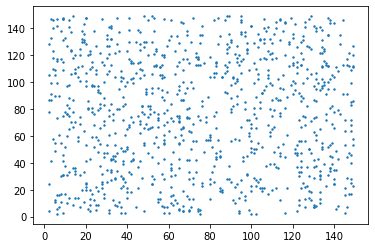

In [2]:
n = 1000 #number of points. These points are candidate for building a facility
u = 30 #unit trasportation cost between customer and facility
koordinat = np.random.randint(2,150,(n,2))
A = scipy.spatial.distance.cdist(koordinat,koordinat)                
B = {i: np.random.randint(100,1000) for i in range(n)}#facility building cost
C = [(i,j) for i in range(n) for j in range(n)]
plt.scatter (koordinat[:,0:1],koordinat[:,1:2],s=2)
plt.show()

In [3]:
mdl = gb.Model("Facility Location")

Using license file C:\Users\aakgul\gurobi.lic
Academic license - for non-commercial use only - expires 2021-04-19


In [4]:
x = mdl.addVars(n, vtype = gb.GRB.BINARY, name = "Xi")#if a faciliy is built at point i, it equals to one, ow 0
y = mdl.addVars(C, vtype = gb.GRB.BINARY, name = "Yij")#if customer i is assigned to facility j, it equals to one, ow 0

In [5]:
#Total cost = building cost of all facilities + transportation cost between customers and facilities.
mdl.setObjective(gb.quicksum(x[i]*B[i] + y[i,j]*A[i,j]*u for i,j in C),gb.GRB.MINIMIZE)

In [6]:
for i in range(n):
    mdl.addConstrs(y[j,i] <= x[i] for j in range(n))#if customer j is assigned facility i, this constrain force that y[j,i] are equal 1.

In [7]:
mdl.addConstrs(gb.quicksum(y[i,j] for j in range(n)) == 1 for i in range(n))#ever cutomer must be assigned to a facility
#mdl.addConstr(gb.quicksum(x[i] for i in range(n)) == 10)#there may be number of facilites limit.

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>,
 20: <gurobi.Constr *Awaiting Model Update*>,
 21: <gurobi.Constr *Awaiting Model Update*>

In [8]:
mdl.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 1001000 rows, 1001000 columns and 3000000 nonzeros
Model fingerprint: 0x19a8f588
Variable types: 0 continuous, 1001000 integer (1001000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e+01, 1e+06]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+00]
Found heuristic solution: objective 3.453682e+08
Presolve removed 0 rows and 0 columns (presolve time = 5s) ...
Presolve removed 0 rows and 0 columns (presolve time = 11s) ...
Presolve time: 10.51s
Presolved: 1001000 rows, 1001000 columns, 3000000 nonzeros
Variable types: 0 continuous, 1001000 integer (1001000 binary)

Deterministic concurrent LP optimizer: primal simplex, dual simplex, and barrier
Showing barrier log only...

Root barrier log...

Ordering time: 0.43s

Barrier statistics:
 Dense cols : 1000
 AA' NZ     : 2.000e+06
 Facto

In [11]:
facility = [a for a in range(n) if x[a].x == 1]
assignment = [b for b in C if y[b].x == 1]

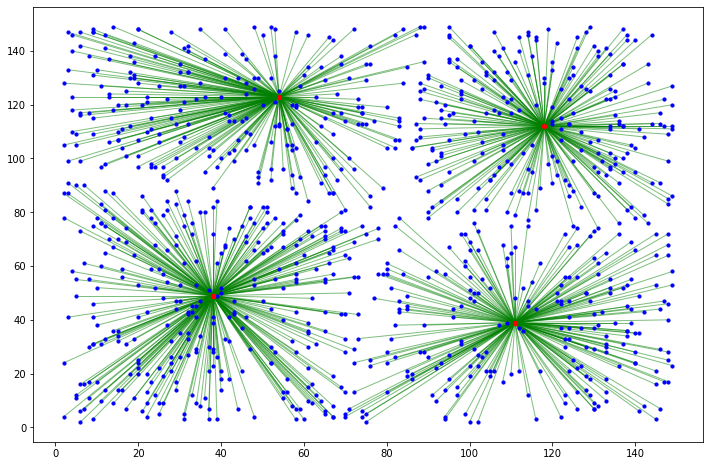

In [12]:
plt.figure(figsize=(12,8))
xc = np.array(koordinat[:,0:1])
yc = np.array(koordinat[:,1:2])
for i,j in assignment:
    plt.plot([xc[i], xc[j]], [yc[i], yc[j]], c='g', zorder=0,linewidth=1,alpha=0.5)
for k in facility:
    plt.plot(xc[k], yc[k], c='r', marker='o', markersize = B[k]/25)#markersize changes by facility building cost.
plt.scatter(xc[0:], yc[0:], c='b',s = 10)